

```
IMPORT NECESSARY LIBRARY


In [0]:
import numpy as np
from keras import models
from keras import layers
from keras.callbacks import History
from keras.models import model_from_json
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import model_from_json

In [2]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [6]:
(train_images,train_labels),(test_images,test_labels)= mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


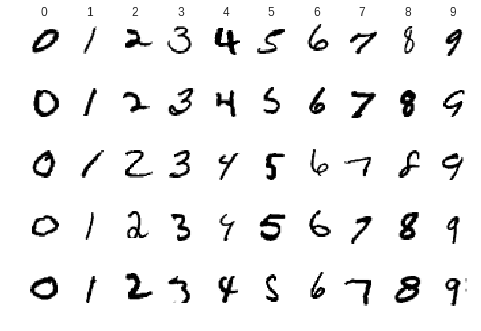

In [7]:
#The images are labeled as 10 classes. Which are enumerated as follows 
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Printing 5 random examples from training images of each class
num_classes = len(classes)
samples_per_class = 5
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(train_labels==y)
    idxs = np.random.choice(idxs,samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(train_images[idx],cmap=plt.cm.binary)
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [8]:
print("Size of the images in the dataset: " + str(train_images.shape[1:3]) + "\n")
print("Number of train images: "+ str(train_images.shape[0]))
print("Number of test images: "+ str(test_images.shape[0]) + "\n")
print("Shape of train image data: "+ str(train_images.shape))
print("Shape of test image data: "+ str(test_images.shape) + "\n")
print("Train labels :" + str(train_labels))
print("Test labels :" + str(test_labels))

Size of the images in the dataset: (28, 28)

Number of train images: 60000
Number of test images: 10000

Shape of train image data: (60000, 28, 28)
Shape of test image data: (10000, 28, 28)

Train labels :[5 0 4 ... 5 6 8]
Test labels :[7 2 1 ... 4 5 6]


In [9]:
#Visualization of an Image in the Train dataset 
#This is how an image is saved in the dataset
index=9 # The image you want to see

print(train_images[index])


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0 189 190   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0 143 247 153   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 136 247 242  86   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 192 252 187   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  62 185  18   

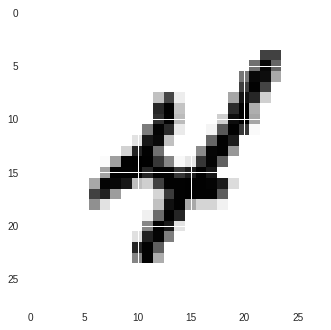

Given Label:4


In [14]:
#Visualization of the same image
plt.imshow(train_images[index],cmap=plt.cm.binary)
plt.show()

print (("Given Label:") + str(train_labels[index]))

In [0]:
#N/W Arch
network=models.Sequential()

In [0]:
network.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))

In [0]:
network.add(layers.Dense(10,activation='softmax'))

In [0]:
network.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
#Preparing the data
#Reshaping 
train_images=train_images.reshape((60000,28*28))
test_images=test_images.reshape((10000,28*28))
print (train_images.shape)
print (test_images.shape)

#Normalising
train_images=train_images.astype('float32')/255
test_images=test_images.astype('float32')/255

(60000, 784)
(10000, 784)


In [0]:
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

In [22]:
h=network.fit(train_images,train_labels,validation_data=(test_images,test_labels),epochs=6,batch_size=128)

Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 6s 102us/step - loss: 0.2688 - acc: 0.9242 - val_loss: 0.1379 - val_acc: 0.9578
Epoch 2/6
60000/60000 [==============================] - 6s 106us/step - loss: 0.1093 - acc: 0.9680 - val_loss: 0.0958 - val_acc: 0.9709
Epoch 3/6
60000/60000 [==============================] - 6s 107us/step - loss: 0.0720 - acc: 0.9788 - val_loss: 0.0773 - val_acc: 0.9754
Epoch 4/6
 4096/60000 [=>............................] - ETA: 5s - loss: 0.0469 - acc: 0.9880

60000/60000 [==============================] - 6s 105us/step - loss: 0.0508 - acc: 0.9849 - val_loss: 0.0723 - val_acc: 0.9778
Epoch 5/6
60000/60000 [==============================] - 6s 102us/step - loss: 0.0379 - acc: 0.9888 - val_loss: 0.0661 - val_acc: 0.9797
Epoch 6/6
60000/60000 [==============================] - 6s 104us/step - loss: 0.0277 - acc: 0.9924 - val_loss: 0.0677 - val_acc: 0.9797


In [23]:
#Save the model

# serialize model to JSON
model_json = network.to_json()
with open("mnist_network.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
network.save_weights("mnist_network.h5")
print("Saved model to drive")

Saved model to drive


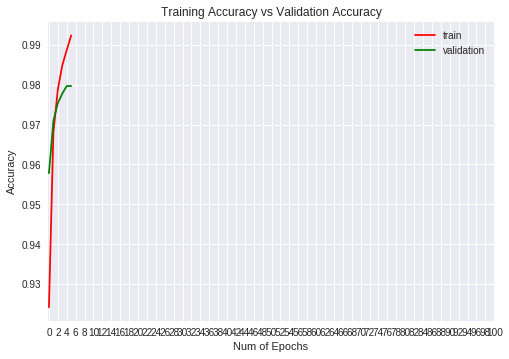

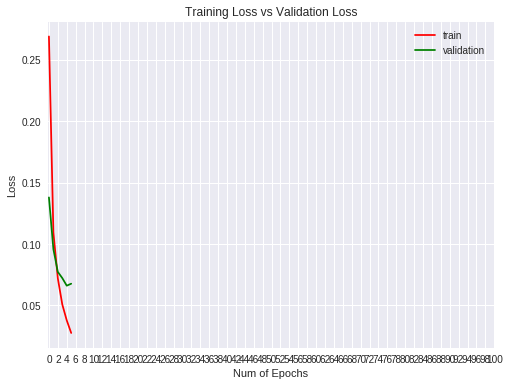

In [25]:
plt.figure(0)
plt.plot(h.history['acc'],'r')
plt.plot(h.history['val_acc'],'g')
plt.xticks(np.arange(0, 101, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
 
 
plt.figure(1)
plt.plot(h.history['loss'],'r')
plt.plot(h.history['val_loss'],'g')
plt.xticks(np.arange(0, 101, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
 
 
plt.show()